<a href="https://colab.research.google.com/github/TheNotoriousXxX/BusReservationSystem/blob/rambo/Refinement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ladi-vton

/content/drive/MyDrive/ladi-vton


# Install

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 28.0 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import glob
import mediapipe
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# ITER

In [ ]:
dresscode = 'final'

# Generator

In [ ]:
filepath = os.path.join('input', f"test_pairs_paired.txt")
with open(filepath, 'r') as f:
    lines = f.read().splitlines()
org_paths = sorted(
      [os.path.join('input', category, 'images', line.strip().split()[0]) for line in lines for
        category in ['lower_body', 'upper_body', 'dresses'] if
        os.path.exists(os.path.join('input', category, 'images', line.strip().split()[0]))])
res_paths = sorted(
                [os.path.join('results/unpaired', category, name) for category in ['lower_body', 'upper_body', 'dresses'] for
                 name in os.listdir(os.path.join('results/unpaired', category)) if
                 os.path.exists(os.path.join('results/unpaired', category, name))])

In [ ]:
assert len(org_paths) == len(res_paths)
sz = len(org_paths)

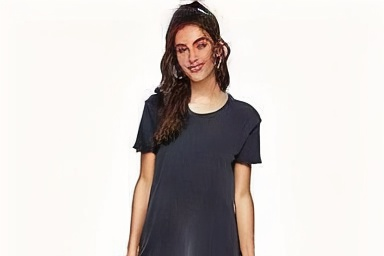

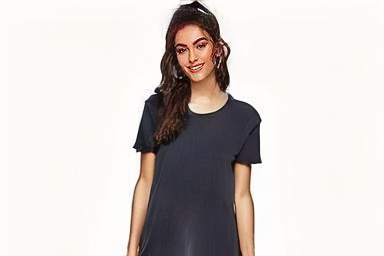

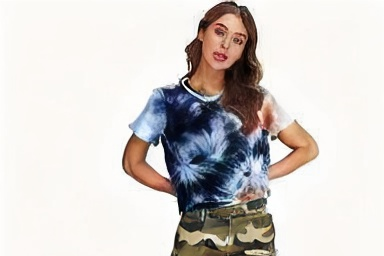

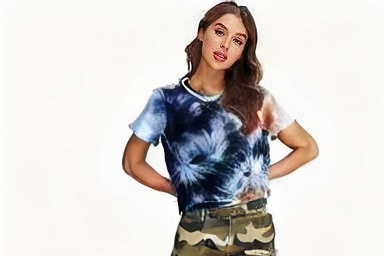

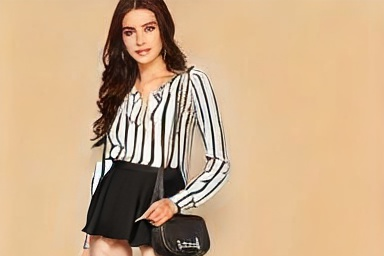

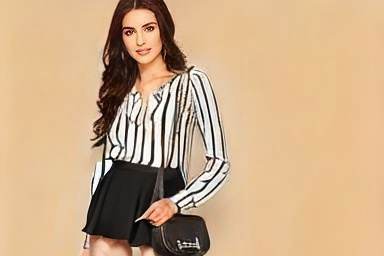

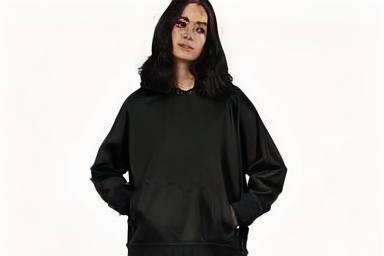

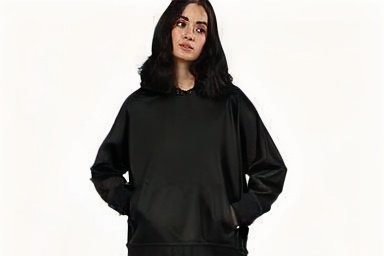

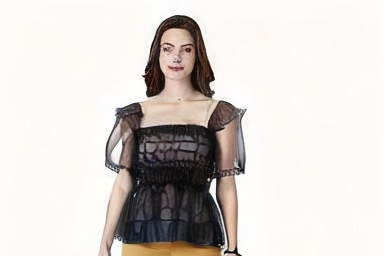

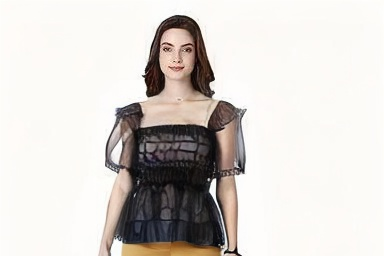

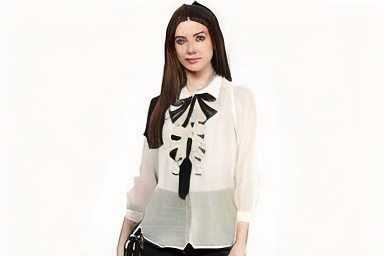

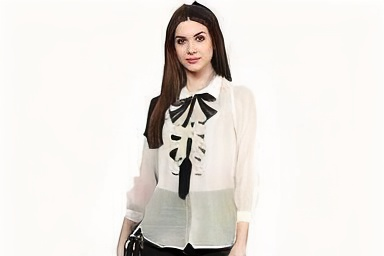

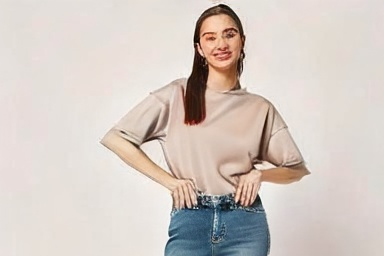

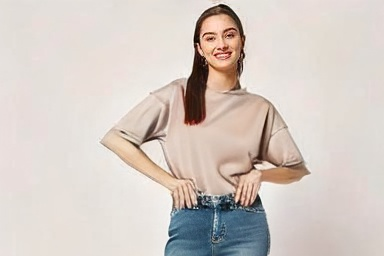

In [ ]:
for iter in range(0,sz):
  org_img = cv2.imread(org_paths[iter])
  org_res = cv2.imread(res_paths[iter])
  h,w = int(org_img.shape[0]/2),org_img.shape[1]
  img = org_img[:h,:w]
  res = org_res[:h,:w]
  cv2_imshow(res)
  mp_face_mesh = mediapipe.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
  results = face_mesh.process(img[:,:,::-1])
  if(results.multi_face_landmarks == None):
     print('miss')
     continue
  landmarks = results.multi_face_landmarks[0]
  df = pd.DataFrame(list(mp_face_mesh.FACEMESH_FACE_OVAL),columns=['p1','p2'])
  routes_idx = []

  p2 = df.iloc[0]['p1']
  p2 = df.iloc[0]['p2']
  for i in range(0,df.shape[0]):
    obj = df[df['p1'] == p2]
    p1 = obj['p1'].values[0]
    p2 = obj['p2'].values[0]

    cur = []
    cur.append(p1)
    cur.append(p2)
    routes_idx.append(cur)

  routes = []
  for sid,tid in routes_idx:
    sxy = landmarks.landmark[sid]
    txy = landmarks.landmark[tid]

    source = (int(sxy.x * img.shape[1]) , int(sxy.y * img.shape[0]))
    target = (int(txy.x * img.shape[1]) , int(txy.y * img.shape[0]))

    routes.append(source)
    routes.append(target)

  mask = np.zeros((img.shape[0],img.shape[1]))
  mask = cv2.fillConvexPoly(mask,np.array(routes),1)
  mask = mask.astype(bool)
  res[mask] = img[mask]
  cv2_imshow(res)
  org_img[:h,:w] = img
  org_res[:h,:w] = res
  cv2.imwrite(res_paths[iter].replace('results/unpaired','final').replace('_0.jpg','_'+dresscode+'.jpg'),org_res)

#Results

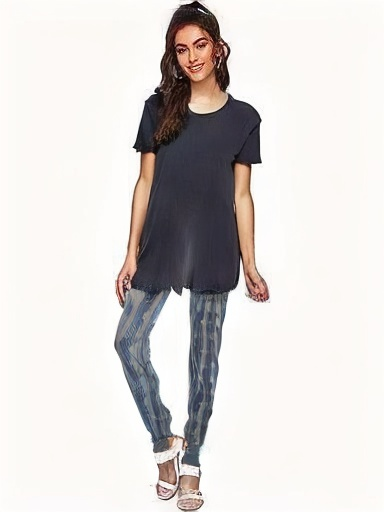

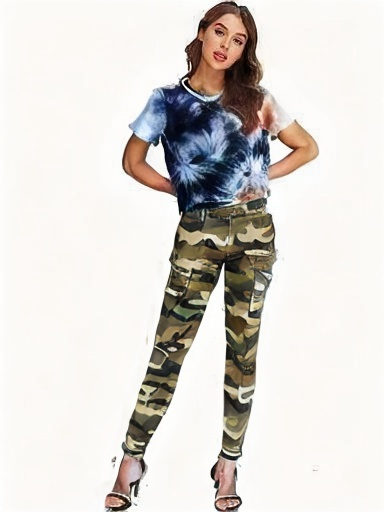

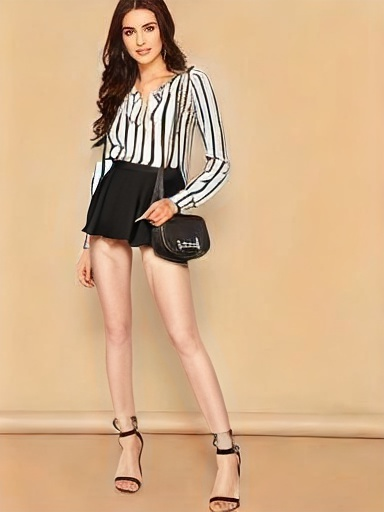

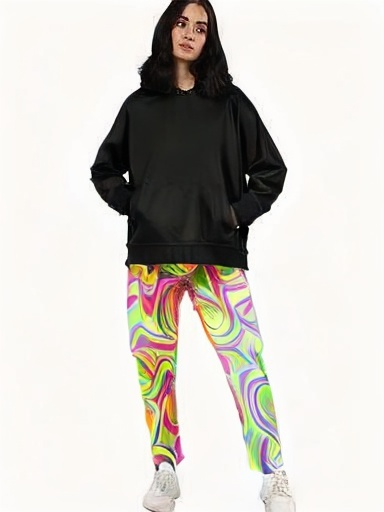

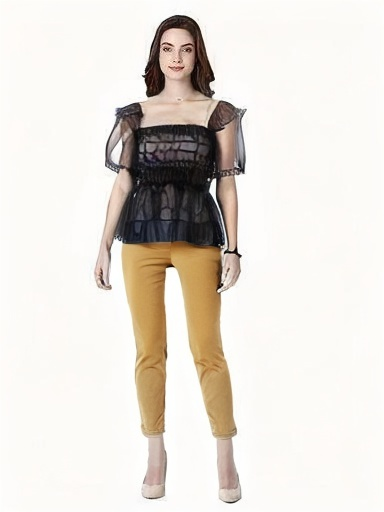

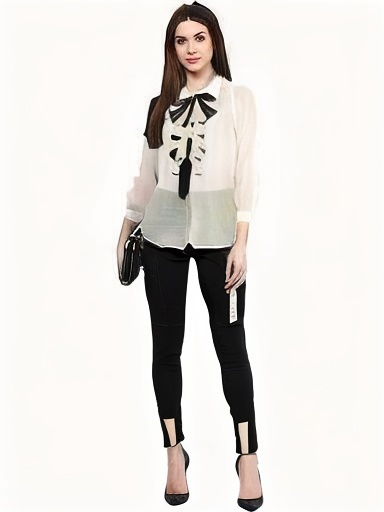

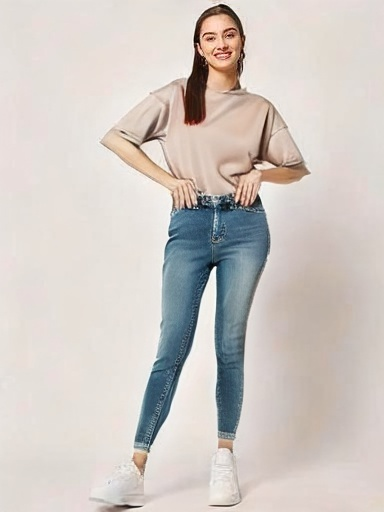

In [ ]:
pattern = 'final/lower_body/*'
for images in glob.glob(pattern):
    if images.endswith( dresscode + ".jpg"):
      cv2_imshow(cv2.imread(images, cv2.IMREAD_UNCHANGED))